In [1]:
import os
import re
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

from impedance import preprocessing
from impedance.models.circuits.circuits import CustomCircuit
from impedance.visualization import plot_nyquist

import analyze_comsol as an_com

%reload_ext autoreload
%autoreload 2

In [26]:
file_dir = r"A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\Table Exports\Fluxes\NoHole_Pinholes"

# We need to treat data flagged "N-0" differently, since they represent a film without a mask
# Therefore the impedance is calculated a little different in COMSOL
match_str = "\G-5_N-[1-9]*10pt-dec.csv"
all_files = glob.glob(file_dir+match_str)
all_files.sort(key=lambda x: x.split("_N-")[-1].split("_")[0])

n0_file = glob.glob(file_dir+"\G-5_N-0*10pt-dec.csv")

Processing A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\Table Exports\Fluxes\NoHole_Pinholes\G-5_N-0_r-5e-3L_f-[1e-3,1e10]_10pt-dec.csv

Filtered 29 data points with positive Im[Z]

Circuit string: R0-p(R1,C1)
Fit: True

Initial guesses:
     R0 = 2.32e+00 [Ohm]
     R1 = 4.30e+01 [Ohm]
     C1 = 5.86e-02 [F]

Fit parameters:
     R0 = 2.33e+00  (+/- 1.29e-03) [Ohm]
     R1 = 4.30e+01  (+/- 3.07e-03) [Ohm]
     C1 = 5.43e-02  (+/- 1.05e-05) [F]



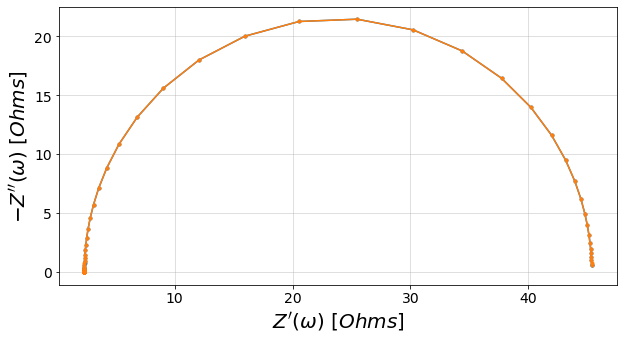

In [29]:
_, ax = plt.subplots(figsize=(10,7))
ax = an_com.process_n0(n0_file[0], ax, return_Z=False, return_ax=False)
plt.show()

## Now do it for the rest

Processing A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\Table Exports\Fluxes\NoHole_Pinholes\G-5_N-1_r-5e-3L_f-[1e-3,1e10]_10pt-dec.csv

Filtered 1 data points with positive Im[Z]
Processing A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\Table Exports\Fluxes\NoHole_Pinholes\G-5_N-2_r-5e-3L_f-[1e-3,1e10]_10pt-dec.csv

Filtered 1 data points with positive Im[Z]
Processing A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\Table Exports\Fluxes\NoHole_Pinholes\G-5_N-5_r-5e-3L_f-[1e-3,1e10]_10pt-dec.csv

Filtered 1 data points with positive Im[Z]


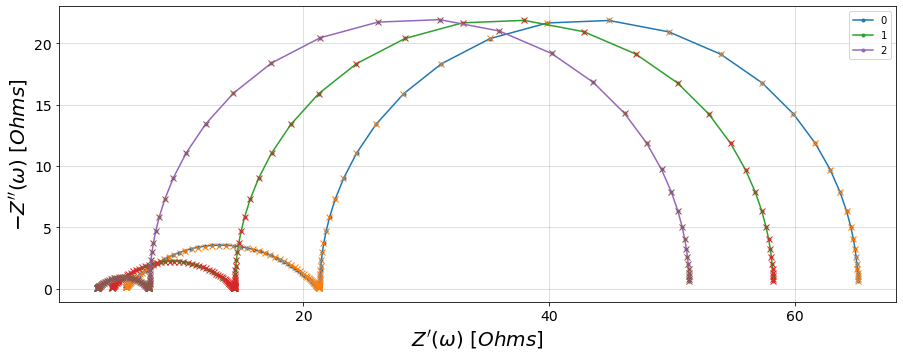

In [34]:
fs, Zs, circs = [], [], []

_, ax = plt.subplots(figsize=(15,10))

for i, file in enumerate(all_files):
    ax, f, Z, circ = an_com.process_n(file, ax, ind=i, return_Z=True, return_ax=True)
        
    fs.append(f)
    Zs.append(Z)
    circs.append(circ)

ax.legend()
plt.show()

# Now do it for G=0.5 files

In [35]:
file_dir = r"A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\Table Exports\Fluxes\NoHole_Pinholes"

# We need to treat data flagged "N-0" differently, since they represent a film without a mask
# Therefore the impedance is calculated a little different in COMSOL
G = r"\G-0_5"
match_str = "_N-[1-9]*10pt-dec.csv"
all_files = glob.glob(file_dir+G+match_str)
all_files.sort(key=lambda x: x.split("_N-")[-1].split("_")[0])

n0_file = glob.glob(file_dir+G+"_N-0*10pt-dec.csv")

Processing A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\Table Exports\Fluxes\NoHole_Pinholes\G-0_5_N-0_r-5e-3L_f-[1e-3,1e10]_10pt-dec.csv

Filtered 20 data points with positive Im[Z]

Circuit string: R0-p(R1,C1)
Fit: True

Initial guesses:
     R0 = 2.32e+02 [Ohm]
     R1 = 4.30e+03 [Ohm]
     C1 = 5.86e-04 [F]

Fit parameters:
     R0 = 2.33e+02  (+/- 3.68e-01) [Ohm]
     R1 = 4.30e+03  (+/- 9.16e-01) [Ohm]
     C1 = 5.43e-04  (+/- 3.14e-07) [F]



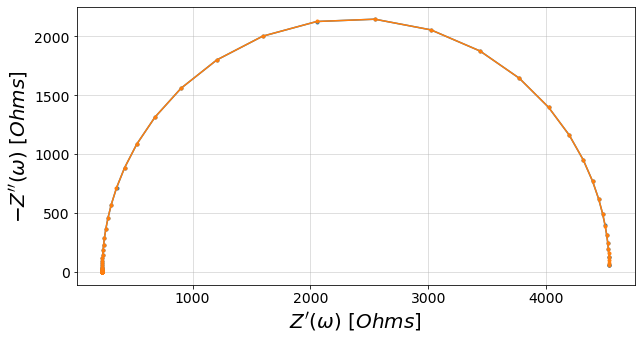

In [36]:
_, ax = plt.subplots(figsize=(10,7))
ax = an_com.process_n0(n0_file[0], ax, return_Z=False, return_ax=False)
plt.show()

Processing A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\Table Exports\Fluxes\NoHole_Pinholes\G-0_5_N-5_r-5e-3L_f-[1e-3,1e10]_10pt-dec.csv

Filtered 1 data points with positive Im[Z]


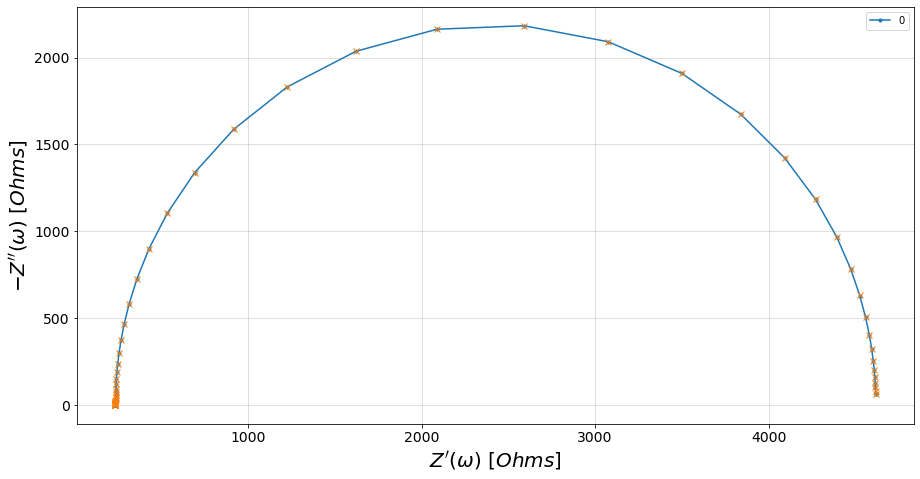

In [37]:
fs, Zs, circs = [], [], []

_, ax = plt.subplots(figsize=(15,10))

for i, file in enumerate(all_files):
    ax, f, Z, circ = an_com.process_n(file, ax, ind=i, return_Z=True, return_ax=True)
        
    fs.append(f)
    Zs.append(Z)
    circs.append(circ)

ax.legend()
plt.show()